In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Downloading contents of the web page
url = "https://en.wikipedia.org/wiki/List_of_districts_in_India"
data = requests.get(url).text

In [3]:
# Creating BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

In [4]:
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))


Classes of each table:
['infobox', 'vevent']
None
['wikitable', 'sortable']
['box-Unreferenced_section', 'plainlinks', 'metadata', 'ambox', 'ambox-content', 'ambox-Unreferenced']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['wikitable', '

In [5]:
# Creating list with all tables
tables = soup.find_all('table')

#  Looking for the table with the classes 'wikitable' and 'sortable'
table = soup.find('table', class_='wikitable sortable')

In [15]:
# Defining of the dataframe
df = pd.DataFrame(columns=['Code', 'State', 'Headquaters', 'Population','Area', 'Density'])

# Collecting Ddata
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    
    if(columns != []):
        code = columns[0].text.strip()
        state = columns[1].text.strip()
        headquaters = columns[2].text.strip()
        population = columns[3].text.strip().replace(',', '')
        area = columns[3].text.strip().replace(',', '')
        density = columns[4].text.strip().replace(',', '')


        df = df.append({'Code': code,  'State': state, 'Headquaters':headquaters, 'Population': population,'Area':area,'Density':density}, ignore_index=True)

In [16]:
df


,Code,State,Headquaters,Population,Area,Density
0,1,Andhra Pradesh,26,49577103,49577103,1906812
1,2,Arunachal Pradesh,26,1383727,1383727,53220
2,3,Assam,35,31205576,31205576,891588
3,4,Bihar,38,104099452,104099452,2739459
4,5,Chhattisgarh,33,25545198,25545198,774097
5,6,Goa,2,1458545,1458545,729273
6,7,Gujarat,33,60439692,60439692,1831506
7,8,Haryana,22,25351462,25351462,1152339
8,9,Himachal Pradesh,12,6864602,6864602,686460
9,10,Jharkhand,24,32988134,32988134,1374506


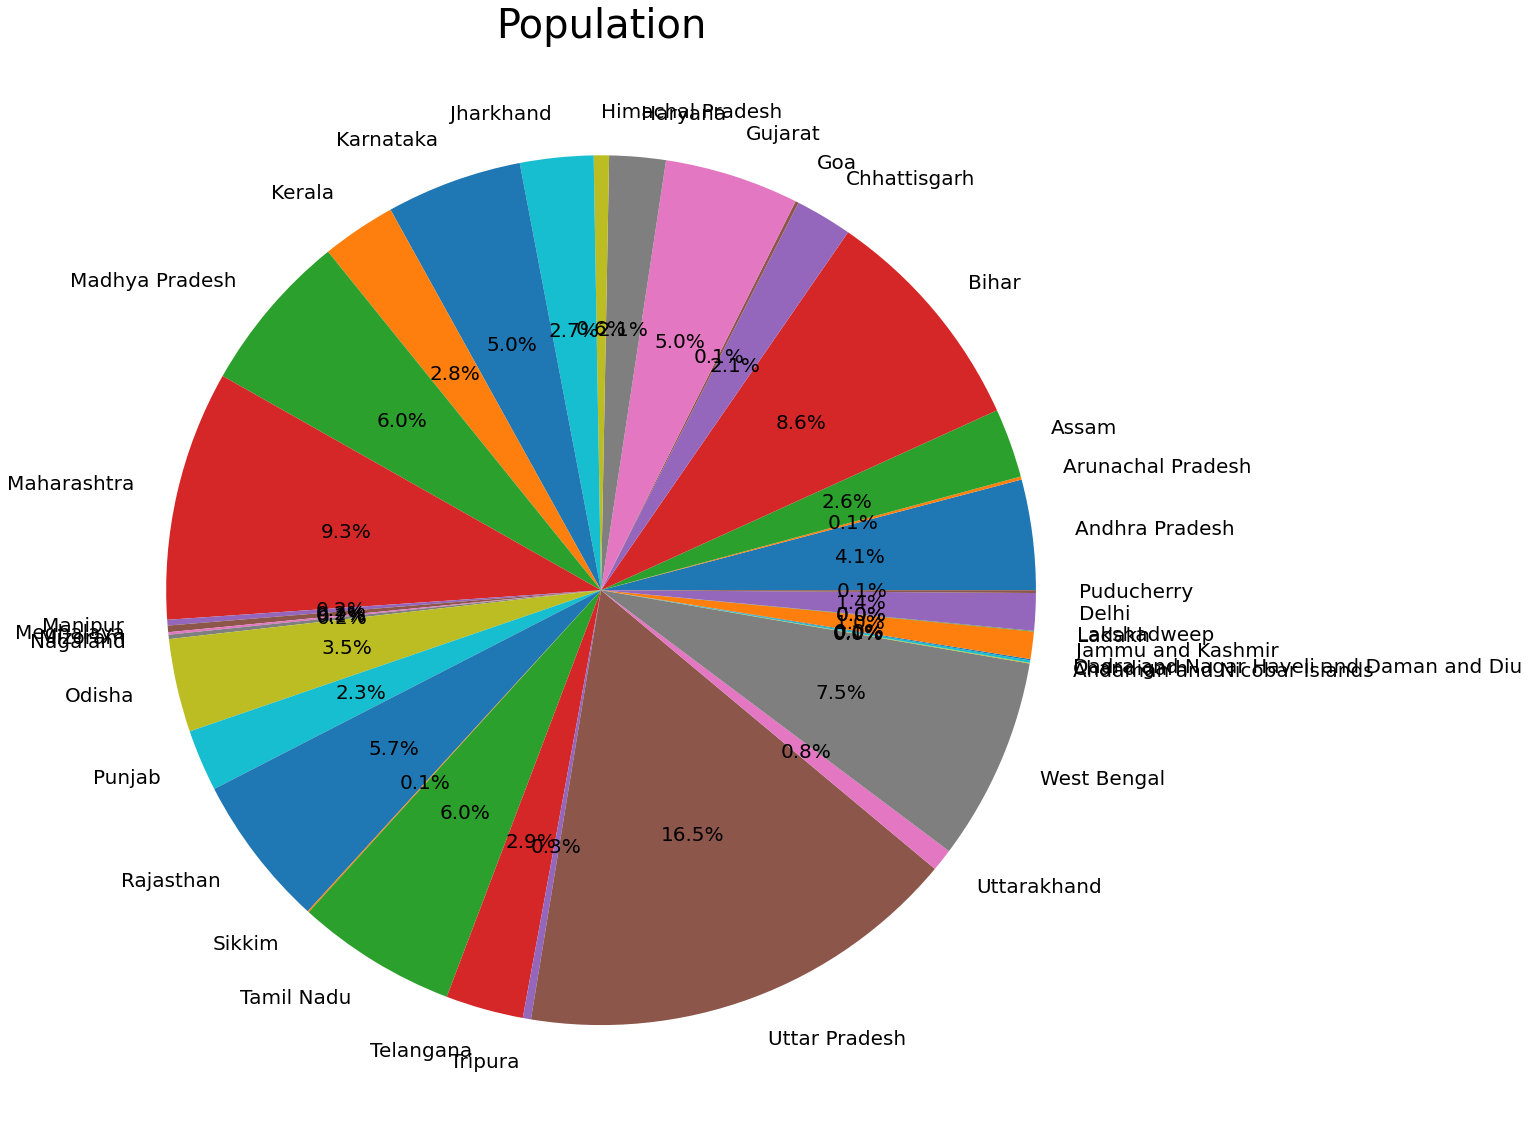

In [19]:
plt.figure(figsize=(20,20))
neigh = df['State']
popu=df['Population']
textprops = {"fontsize":20}
plt.pie(popu, labels=neigh,autopct='%.1f%%',textprops =textprops) 
plt.title('Population',fontsize=40)
plt.show()

C:\Users\RUSHIKESH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


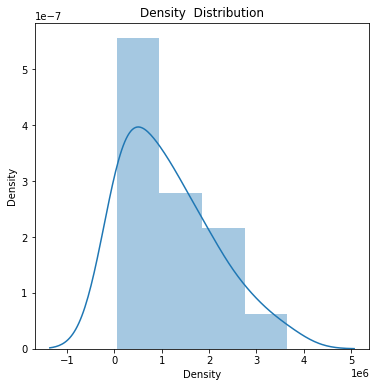

In [20]:
#Distribution of the bmi value distribution plot

plt.figure(figsize=(6,6))
sns.distplot(df['Density']) 
plt.title('Density  Distribution')
plt.show()

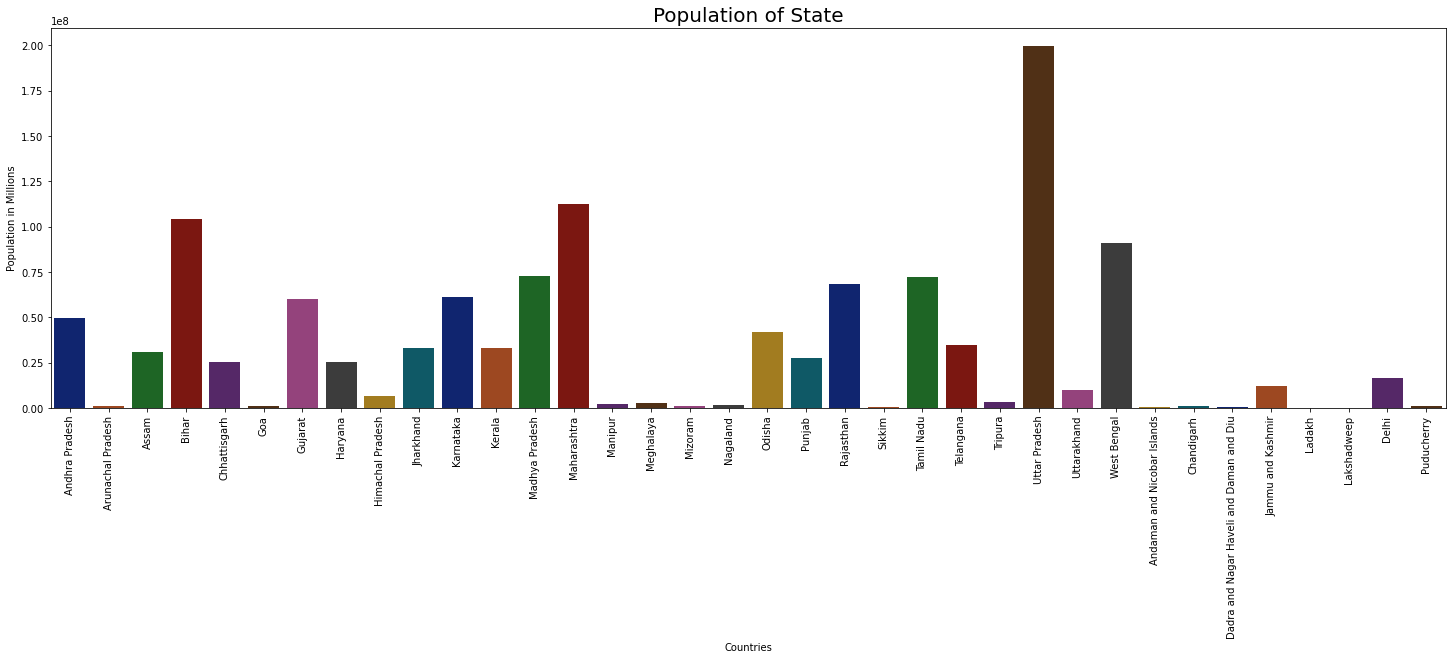

In [30]:
plt.rcParams['figure.figsize'] = (25, 7)
df['Population']=df['Population'].astype('int')
ax = sns.barplot(x = df['State'], y = df['Population'], palette = 'dark')
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_ylabel(ylabel = 'Population in Millions', fontsize = 10)
ax.set_title(label = 'Population of State', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()